In [6]:
#get data from web

import urllib
import datetime
import numpy as np

### get the url for the downloadable csv-file data
def make_url(ticker_symbol, start_date, end_date):
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    # print ticker_symbol
    a = start_date
    b = end_date
    dt_url = '%s&a=%d&b=%d&c=%d&d=%d&e=%d&f=%d&g=d&ignore=.csv'% (ticker_symbol, a.month-1, a.day, a.year, b.month-1, b.day,b.year)
    return base_url + dt_url

### create a path to save the file downloaded from web
#mac
#output_path = "/Users/apple/Downloads/lecture4" ## <======Please change to your own directory
#win
output_path = "C:/Users/bjd/Desktop/data" ## <======Please change to your own directory


def make_filename(ticker_symbol):
    return output_path + "/" + ticker_symbol + ".csv"
    

### pull the data out from web and store the file in the path that designed above
def pull_historical_data(ticker_symbol, start_date, end_date):
    try:
        urllib.urlretrieve(make_url(ticker_symbol, start_date, end_date), make_filename(ticker_symbol))
    except urllib.ContentTooShortError as e:
        outfile = open(make_filename(ticker_symbol), "w")
        outfile.write(e.content)
        outfile.close()


start = datetime.date(2012,1,1)
end = datetime.date(2013,1,1)
aapl = pull_historical_data('aapl',start,end) ###<=== get historical time-series data for  AAPL

import os
os.chdir( "C:/Users/bjd/Desktop/data")
                           
### only read adj close price for AAPL

aapl_csv = np.genfromtxt('aapl.csv', delimiter=",", skip_header=1)
aapl = aapl_csv[:, 6] ###<=== extract closing price data for  AAPL





In [12]:

#changing directory

import os
#mac
#os.chdir( "/Users/apple/Downloads/lecture4/")
#win
os.chdir( "C:/Users/bjd/Desktop/data") 

start = datetime.date(2012,1,1)
end = datetime.date(2013,1,1)

### only read adj close price for AAPL

hpq = pull_historical_data('hpq',start,end) ###<=== get historical time-series data for  HPQ
hpq_csv = np.genfromtxt('hpq.csv', delimiter=",", skip_header=1)

spy = pull_historical_data('spy',start,end) ###<=== get historical time-series data for  SPY
spy_csv = np.genfromtxt('spy.csv', delimiter=",", skip_header=1)



In [13]:

import pandas as pd
data1 = pd.read_csv('hpq.csv', sep=',', na_values=".")
data2 = pd.read_csv('spy.csv', sep=',', na_values=".")

hpq_price = data1['Adj Close'] 
spy_price = data2['Adj Close']


In [121]:

#Converting to returns

log_return_hpq=np.log(hpq_price/hpq_price.shift(1))
log_return_spy=np.log(spy_price/spy_price.shift(1))

data3 = pd.DataFrame({'log_return_hpq': log_return_hpq, 'log_return_spy': log_return_spy})


import statsmodels.formula.api as sm

model = sm.ols(formula="log_return_hpq ~ log_return_spy", data=data3).fit()

print(model.summary())
model.params
model.rsquared
model.resid



                            OLS Regression Results                            
Dep. Variable:         log_return_hpq   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     76.44
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           3.56e-16
Time:                        01:00:52   Log-Likelihood:                 621.04
No. Observations:                 249   AIC:                            -1238.
Df Residuals:                     247   BIC:                            -1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0031      0.001      2.

1     -0.020428
2      0.007660
3      0.000669
4     -0.016859
5      0.015832
6     -0.009617
7      0.001398
8     -0.003176
9     -0.009955
10     0.050472
11    -0.025433
12    -0.009662
13    -0.021216
14    -0.000702
15    -0.027726
16    -0.006840
17     0.000865
18    -0.021878
19    -0.055127
20    -0.000753
21    -0.010574
22    -0.009131
23    -0.021437
24     0.019994
25    -0.029937
26    -0.025266
27    -0.019985
28     0.124782
29    -0.009580
30     0.021478
         ...   
220   -0.011038
221   -0.016308
222    0.005474
223    0.000690
224    0.010566
225   -0.016466
226   -0.006198
227    0.006646
228   -0.003503
229    0.008153
230   -0.018460
231   -0.007252
232   -0.007916
233    0.000162
234    0.001399
235    0.015533
236    0.000862
237   -0.026107
238   -0.033405
239   -0.001332
240   -0.007989
241    0.003402
242    0.006833
243   -0.011363
244   -0.000509
245   -0.000496
246   -0.001269
247   -0.002963
248    0.004339
249   -0.000200
dtype: float64

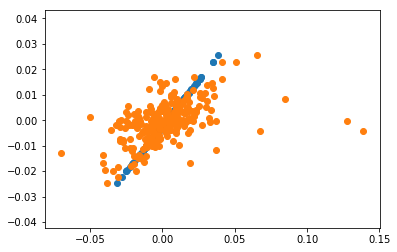

In [122]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

y_predict = model.predict(sm.add_constant(log_return_spy), transform=False)

plt.scatter(y_predict,log_return_spy)
plt.scatter(log_return_hpq,log_return_spy)
